# Lorenz Attractor

---

This notebook implements the beautiful [Lorenz Attractor](https://en.wikipedia.org/wiki/Lorenz_system) in Julia. The Lorenz Attractor is probably the most illustrative example of a system that exhibits chaotic behavior. Slightly changing the initial conditions of the system leads to completely different solutions. The system itself corresponds to the movement of a point particle in a 3D space over time.

![Lorenz Attractor](http://upload.wikimedia.org/wikipedia/commons/e/e0/Lorenz.png)

Image courtesy of [WikiMedia](http://upload.wikimedia.org/wikipedia/commons/e/e0/Lorenz.png).

The system is formally described by three different differential equations. These equations represent the movement
of a point $(x, y, z)$ in space over time. In the following equations, $t$ represents time, $\sigma$, $\rho$, $\beta$ are constants.

$$ \frac{dx}{dt} = \sigma (y - x) $$

$$ \frac{dy}{dt} = x (\rho - z) - y $$

$$ \frac{dz}{dt} = x y - \beta z $$

---

Let's start by importing ODE.

In [1]:
using ODE;

We need to define the system of differential equations as an equation of the form: ${\bf r}' = {\bf f}(t, {\bf r})$ where ${\bf r} = (x, y, z)$ and ${\bf f}(t, {\bf r})$ is the mapping function and $t$ is time. 

In [2]:
function f(t, r)
    # Extract the coordinates from the r vector
    (x, y, z) = r
    
    # The Lorenz equations
    dx_dt = sigma*(y - x)
    dy_dt = x*(rho - z) - y
    dz_dt = x*y - bet*z
    
    # Return the derivatives as a vector
    [dx_dt; dy_dt; dz_dt]
end;

Let's define the initial conditions of the system ${\bf r}_0 = (x_0, y_0, z_0)$, the constants $\sigma$, $\rho$ and $\beta$ and a time grid.

In [3]:
# Define time vector and interval grid
const dt = 0.001
const tf = 100.0
t = 0:dt:tf

# Initial position in space
const r0 = [0.1; 0.0; 0.0]

# Constants sigma, rho and beta
const sigma = 10.0
const rho   = 28.0
const bet   = 8.0/3.0;

Now let's solve the differencial equations numericaly and extract the corresponding $(x, y, z)$:

In [4]:
(t, pos) = ode45(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

Let's see how it looks in 3D.

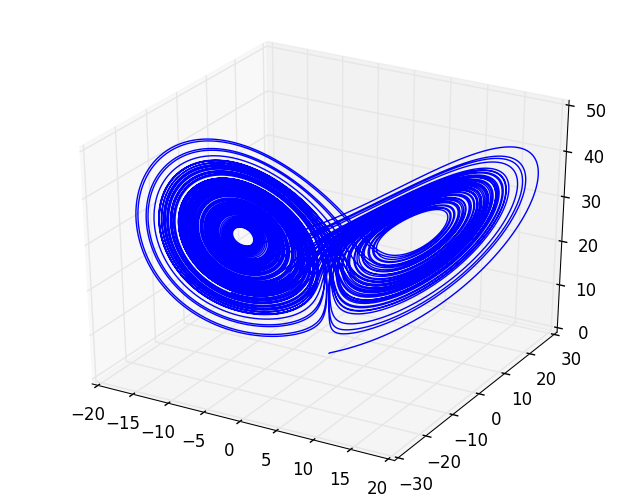

In [5]:
using PyPlot
plot3D(x, y, z);

Let's see different cuts around the axes:

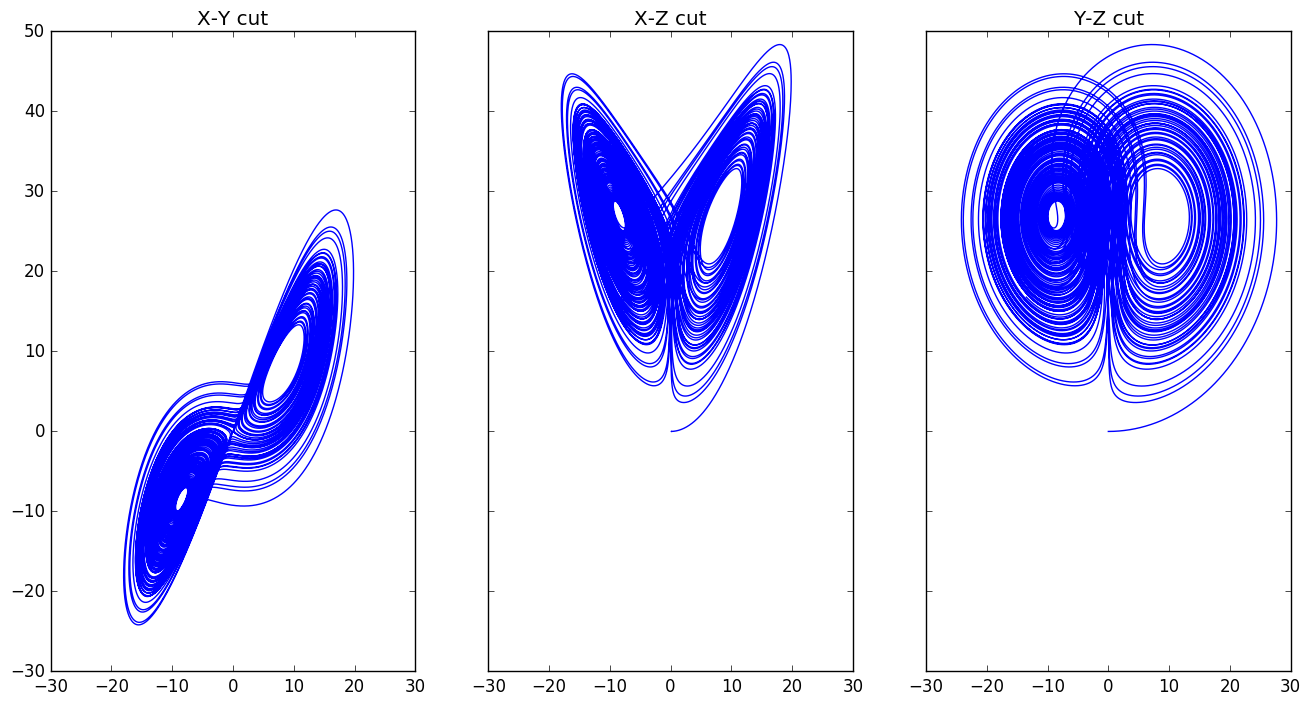

In [6]:
fig, ax = subplots(1, 3, sharex=true, sharey=true, figsize=(16,8))

ax[1][:plot](x, y)
ax[1][:set_title]("X-Y cut")

ax[2][:plot](x, z)
ax[2][:set_title]("X-Z cut")

ax[3][:plot](y, z)
ax[3][:set_title]("Y-Z cut");